<a href="https://colab.research.google.com/github/Kh0uloud/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/blob/main/GYM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

import zipfile

Mounted at /content/drive


In [ ]:
%cd /content
!git clone https://github.com/Kh0uloud/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback.git

/content
Cloning into 'Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 43 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (43/43), 124.32 KiB | 3.36 MiB/s, done.
Resolving deltas: 100% (7/7), done.


## Downlowding a Dataset from Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d zackyboi/puregym-customer-reviews-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/zackyboi/puregym-customer-reviews-sentiment-analysis
License(s): unknown
 60% 5.00M/8.31M [00:00<00:00, 44.9MB/s]
100% 8.31M/8.31M [00:00<00:00, 40.3MB/s]


In [ ]:
with zipfile.ZipFile('/content/puregym-customer-reviews-sentiment-analysis.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [ ]:
df = pd.read_csv('/content/PureGym Customer Reviews.csv')

In [ ]:
os.makedirs('/content/drive/MyDrive/GYMProject', exist_ok=True)

# Save the DataFrame to a CSV file in your Google Drive
df.to_csv('/content/drive/MyDrive/GYMProject/CustomerReviews.csv', index=False)

## Dataset and PreProcessing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GYMProject/CustomerReviews.csv')

In [ ]:
df

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response
0,1,EC,Elena Curtis,GB,4,2023-12-17,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided
1,4,Custom Image,Graham F,GB,4,2023-12-13,Overall a good experience,overall a good experience. its still too cramp...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...
2,8,IO,Ian Oldham,GB,5,2023-12-12,Excellent gym,"excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...
3,15,MB,Mick Bayley,GB,5,2023-11-12,I'm going to be so fit,havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided
4,1,LU,Lucy,GB,5,2023-12-13,Chloe Lawrence PT at PureGym,i have been training with chloe lawrence at pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...
...,...,...,...,...,...,...,...,...,...,...,...
31644,12,OL,Olga,GB,4,2015-10-23,Cheap and cheerful,if you are not very picky and dont expect saun...,PureGym UK,No Date Provided,No Response Provided
31645,12,Custom Image,Paul John Cox,GB,5,2015-02-18,NO excuses now!,i admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided
31646,22,Custom Image,Charlotte,DK,5,2015-02-07,Great classes,"the classes are great, i signed up due to the ...",PureGym UK,No Date Provided,No Response Provided
31647,15,RA,Ross Anderson,GB,4,2014-08-12,Decent gym,the pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided


In [ ]:
id=31648
df['Review Title'].iloc[id], df['Review'].iloc[id], df['Rating'].iloc[id], df['Owners Response'].iloc[id]

('poor customer service',
 'called to try and change my direct debit date over only to be met by someone who clearly couldnt be bothered to help, the call was disconnected so i called back to advise if i was unable to carry out this change i wanted to cancel my membership... 2nd person i spoke with again had the same attitude and jus told me to cancel the direct debit... good customer service is something there dept who deal with direct debits clearly lack!',
 1,
 'No Response Provided')

In [ ]:
# Count occurrences of each unique 'Owner'
owner_counts = df['Owner'].value_counts()
print(owner_counts)

Owner
PureGym UK    31649
Name: count, dtype: int64


In [ ]:
from nltk.corpus import  stopwords
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

def preprocess_text(text: str) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)

    # remove stopwords
    tokens = nltk.word_tokenize(text)
    tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
    text = " ".join(tokens)
    text = text.lower().strip()

    return text

df['Review_cleaned'] = df['Review'].apply(lambda text: preprocess_text(text))
df = df[df['Review_cleaned'] != '']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df

,Total Reviews,Profile Image,Customer Name,Country Code,Rating,Date Experienced,Review Title,Review,Owner,Owner Date Posted,Owners Response,Review_cleaned
0,1,EC,Elena Curtis,GB,4,2023-12-17,"A well equipped gym, lacked cleaning facilities",a well equipped gym and only noticed one machi...,PureGym UK,No Date Provided,No Response Provided,well equipped gym noticed one machine order di...
1,4,Custom Image,Graham F,GB,4,2023-12-13,Overall a good experience,overall a good experience. its still too cramp...,PureGym UK,2 days ago,Hi Graham. Thanks for taking the time to leave...,overall good experience still cramped compared...
2,8,IO,Ian Oldham,GB,5,2023-12-12,Excellent gym,"excellent gym, friendly environment, plenty of...",PureGym UK,2 days ago,Hi Ian. Thanks for taking the time to leave th...,excellent gym friendly environment plenty choi...
3,15,MB,Mick Bayley,GB,5,2023-11-12,I'm going to be so fit,havnt been a gym member for 20 years but this ...,PureGym UK,No Date Provided,No Response Provided,havnt gym member years state art brand new fri...
4,1,LU,Lucy,GB,5,2023-12-13,Chloe Lawrence PT at PureGym,i have been training with chloe lawrence at pu...,PureGym UK,2 days ago,Hi Lucy. Thanks for taking the time to leave t...,training chloe lawrence pure gym months soon f...
...,...,...,...,...,...,...,...,...,...,...,...,...
31644,12,OL,Olga,GB,4,2015-10-23,Cheap and cheerful,if you are not very picky and dont expect saun...,PureGym UK,No Date Provided,No Response Provided,picky dont expect saunas swimming facilities e...
31645,12,Custom Image,Paul John Cox,GB,5,2015-02-18,NO excuses now!,i admit im not in the best shape and intend to...,PureGym UK,No Date Provided,No Response Provided,admit im best shape intend improve fitness muc...
31646,22,Custom Image,Charlotte,DK,5,2015-02-07,Great classes,"the classes are great, i signed up due to the ...",PureGym UK,No Date Provided,No Response Provided,classes great signed due low price im satisfie...
31647,15,RA,Ross Anderson,GB,4,2014-08-12,Decent gym,the pure gyms are well equipped and have every...,PureGym UK,No Date Provided,No Response Provided,pure gyms well equipped everything need good w...


## ABSA: Inference with a pre-trained model

### PyABSA Model
<h3> PyABSA Documentation </h3>
<h4> <a href="https://pyabsa.readthedocs.io/en/latest/6_tutorials/Aspect_Term_Extraction.html">Aspect Term Extraction and Sentiment Classification Tutorial</a> </h4> <br>


In [ ]:
!pip install pyabsa==1.16.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of boostaug to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
from pyabsa import available_checkpoints
checkpoint_map = available_checkpoints('atepc')

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<fro

No CUDA GPU found in your device


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<fro

Version 1.16.16 of pyabsa is outdated. Version 2.4.1 was released Friday February 23, 2024.
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json
********** Available atepc model checkpoints for Version:1.16.16 (this version) **********
----------------------------------------------------------------------------------------------------
Checkpoint Name: english
id: 
Training Model: FAST-LCFS-ATEPC
Training Dataset: English
Language: English
Description: Trained on RTX3090, this checkpoint use bert-spc in ATEPC training
Available Version: 1.16.0+
Checkpoint File: fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip
Author: H, Yang (yangheng@m.scnu.edu.cn)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Checkpoint Name: chinese
id: 
Training Model: FAST-LCF-ATEPC
Training Dataset: Chines

/usr/local/lib/python3.11/dist-packages/pyabsa/functional/checkpoint/checkpoint_manager.py:298: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if max_ver == 'N.A.' or StrictVersion(min_ver) <= StrictVersion(__version__) <= StrictVersion(max_ver):


There may be some checkpoints available for early versions of PyABSA, see atepc


In [ ]:
### Runtime Crash for PyABSA

from pyabsa import ABSADatasetList, available_checkpoints
from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='multilingual-256-2',
                                   auto_device=True  # False means load model on CPU
                                   )

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<fro

Version 1.16.16 of pyabsa is outdated. Version 2.4.1 was released Friday February 23, 2024.
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json
********** Available ATEPC model checkpoints for Version:1.16.16 (this version) **********
----------------------------------------------------------------------------------------------------
Checkpoint Name: english
id: 
Training Model: FAST-LCFS-ATEPC
Training Dataset: English
Language: English
Description: Trained on RTX3090, this checkpoint use bert-spc in ATEPC training
Available Version: 1.16.0+
Checkpoint File: fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip
Author: H, Yang (yangheng@m.scnu.edu.cn)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Checkpoint Name: chinese
id: 
Training Model: FAST-LCF-ATEPC
Training Dataset: Chines

/usr/local/lib/python3.11/dist-packages/pyabsa/functional/checkpoint/checkpoint_manager.py:298: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if max_ver == 'N.A.' or StrictVersion(min_ver) <= StrictVersion(__version__) <= StrictVersion(max_ver):


There may be some checkpoints available for early versions of PyABSA, see ATEPC
Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


814MB [00:38, 21.29MB/s, Downloading checkpoint...]                         


Find zipped checkpoint: ./checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc_Multilingual_cdw_apcacc_86.68_apcf1_80.63_atef1_75.15.zip, unzipping...
Done.
If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA-ATEPC/resolve/main/checkpoint/Multilingual/ATEPC/fast_lcf_atepc_Multilingual_cdw_apcacc_86.68_apcf1_80.63_atef1_75.15.zip 
Load aspect extractor from ./checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT
config: ./checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.config
state_dict: ./checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: ./checkpoints/ATEPC_MULTILINGUAL-256-2_CHECKPOINT/fast_lcf_atepc.tokenizer


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [ ]:
os.makedirs('/content/checkpoints/atepc_Multilingual', exist_ok=True)

# Load the checkpoint from drive and unzip it
!unzip /content/drive/MyDrive/GYMProject/checkpoints/fast_lcf_atepc_Multilingual_cdw_apcacc_86.76_apcf1_79.78_atef1_78.03.zip -d /content/checkpoints/atepc_Multilingual

Archive:  /content/drive/MyDrive/GYMProject/checkpoints/fast_lcf_atepc_Multilingual_cdw_apcacc_86.76_apcf1_79.78_atef1_78.03.zip
  inflating: /content/checkpoints/atepc_Multilingual/fast_lcf_atepc.args.txt  
  inflating: /content/checkpoints/atepc_Multilingual/fast_lcf_atepc.config  
  inflating: /content/checkpoints/atepc_Multilingual/fast_lcf_atepc.state_dict  
  inflating: /content/checkpoints/atepc_Multilingual/fast_lcf_atepc.tokenizer  


In [ ]:
### Runtime Crash

from pyabsa import ABSADatasetList
from pyabsa import ATEPCCheckpointManager

inference_source = ['But the staff was so perfect to us, but the service was bad .',
            ]
# Specify the path where the model is extracted
checkpoint_path = "/content/checkpoints/atepc_Multilingual"

# Load the model from the local checkpoint
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(
    checkpoint=checkpoint_path,  # Use local checkpoint path
    auto_device=False  # If True: Automatically use GPU if available
)

atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                          save_result=True,
                          print_result=True,  # print the result
                          pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                          )

Load aspect extractor from checkpoints/atepc_Multilingual
config: checkpoints/atepc_Multilingual/fast_lcf_atepc.config
state_dict: checkpoints/atepc_Multilingual/fast_lcf_atepc.state_dict
model: None
tokenizer: checkpoints/atepc_Multilingual/fast_lcf_atepc.tokenizer


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [ ]:
# Convert the 'Review' column to a list of sentences
sentences = df['Review'].tolist()

# Perform inference
atepc_result = aspect_extractor.extract_aspect(
    inference_source=sentences,  # Pass the list of reviews
    save_result=False,  # Don't save as a file, since we store in DataFrame
    print_result=False,  # Don't print to keep it clean
    pred_sentiment=True  # Predict sentiment for extracted aspects
)

# Extract aspects and their sentiments from results
aspect_sentiments = []
for result in atepc_result:
    extracted_aspects = result.get("aspect", [])
    sentiments = result.get("sentiment", [])

    # Convert extracted aspects & sentiments into a formatted string
    formatted_result = "; ".join([f"{asp} ({sent})" for asp, sent in zip(extracted_aspects, sentiments)])

    aspect_sentiments.append(formatted_result)

# Add results to the DataFrame
df["ABSA"] = aspect_sentiments

# Save the DataFrame with results
df.to_csv("your_dataset_with_ABSA.csv", index=False)

# Display a preview
df.head()

In [ ]:
# Create a new list to store the structured output
structured_data = []

# Process results
for i, result in enumerate(atepc_result):
    aspects = result["aspect"]  # Extracted aspect terms
    sentiments = result["sentiment"]  # Corresponding sentiment labels

    # Store each aspect-sentiment pair separately
    for aspect, sentiment in zip(aspects, sentiments):
        structured_data.append({"id": i, "aspect": aspect, "sentiment": sentiment})

# Convert to a DataFrame
df_aspects = pd.DataFrame(structured_data)

# Display the structured DataFrame
print(df_aspects)

### Model2

Sentiment Classification only (the input is the review + the aspect)

In [ ]:
!pip install transformers[sentencepiece]

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline

# Load Aspect-Based Sentiment Analysis model
absa_tokenizer = AutoTokenizer.from_pretrained("yangheng/deberta-v3-base-absa-v1.1")
absa_model = AutoModelForSequenceClassification \
  .from_pretrained("yangheng/deberta-v3-base-absa-v1.1")

# Load a traditional Sentiment Analysis model
sentiment_model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_model = pipeline("sentiment-analysis", model=sentiment_model_path,
                          tokenizer=sentiment_model_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
sentence = "We had a great experience at the restaurant, food was delicious, but the service was kinda bad"
print(f"Sentence: {sentence}")
print()

# ABSA of "food"
aspect = "food"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'food' is:
# Label negative: 0.0009989114478230476
# Label neutral: 0.001823813421651721
# Label positive: 0.997177243232727

# ABSA of "service"
aspect = "service"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'service' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

# Overall sentiment of the sentence
sentiment = sentiment_model([sentence])[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")
# Overall sentiment: Negative with score 0.7706006765365601

Sentence: We had a great experience at the restaurant, food was delicious, but the service was kinda bad

Sentiment of aspect 'food' is:
Label negative: 0.0009989108657464385
Label neutral: 0.0018238099291920662
Label positive: 0.997177243232727

Sentiment of aspect 'service' is:
Label negative: 0.9946129322052002
Label neutral: 0.0023699868470430374
Label positive: 0.003017078386619687

Overall sentiment: negative with score 0.7706001400947571


In [ ]:
df['Review'][0]

'a well equipped gym and only noticed one machine out of order. disappointed with the lack of blue towel and sanitizer spray for customers to use once they have finished with equipment. and notices asking customers to do so as a matter of respect for other users'

In [ ]:
sentence = df['Review'][0]
print(f"Sentence: {sentence}")
print()

# ABSA of "Music"
aspect = "Music"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'Music' is:
# Label negative: 0.0009989114478230476
# Label neutral: 0.001823813421651721
# Label positive: 0.997177243232727

# ABSA of "service"
aspect = "service"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'service' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

# ABSA of "gym"
aspect = "gym"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'gym' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

# ABSA of "customers"
aspect = "customers"
inputs = absa_tokenizer(f"[CLS] {sentence} [SEP] {aspect} [SEP]", return_tensors="pt")
outputs = absa_model(**inputs)
probs = F.softmax(outputs.logits, dim=1)
probs = probs.detach().numpy()[0]
print(f"Sentiment of aspect '{aspect}' is:")
for prob, label in zip(probs, ["negative", "neutral", "positive"]):
  print(f"Label {label}: {prob}")
print()
# Sentiment of aspect 'customers' is:
# Label negative: 0.9946129322052002
# Label neutral: 0.002369985682889819
# Label positive: 0.003017079783603549

# Overall sentiment of the sentence
sentiment = sentiment_model([sentence])[0]
print(f"Overall sentiment: {sentiment['label']} with score {sentiment['score']}")
# Overall sentiment: Negative with score 0.7706006765365601

Sentence: a well equipped gym and only noticed one machine out of order. disappointed with the lack of blue towel and sanitizer spray for customers to use once they have finished with equipment. and notices asking customers to do so as a matter of respect for other users

Sentiment of aspect 'Music' is:
Label negative: 0.01396559365093708
Label neutral: 0.03703732043504715
Label positive: 0.9489971399307251

Sentiment of aspect 'service' is:
Label negative: 0.01525126863270998
Label neutral: 0.03125474601984024
Label positive: 0.9534939527511597

Sentiment of aspect 'gym' is:
Label negative: 0.001155524980276823
Label neutral: 0.003261364996433258
Label positive: 0.9955831170082092

Sentiment of aspect 'customers' is:
Label negative: 0.0595688633620739
Label neutral: 0.05942573398351669
Label positive: 0.8810053467750549

Overall sentiment: negative with score 0.9268788695335388


## InstructABSA: Instruction learning for Aspect Based Sentiment Classification [NAACL]

<h4> <a href="https://github.com/kevinscaria/InstructABSA/tree/main"> Github Repository & Notebooks </a> </h4> <br>

<b> Cross Domain </b>: Here the model is pre-trained on  domains (laptops and restaurants) and tested on a different domain (GYM)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Aspect Term Extraction

tokenizer = AutoTokenizer.from_pretrained("kevinscaria/ate_tk-instruct-base-def-pos-neg-neut-combined")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/ate_tk-instruct-base-def-pos-neg-neut-combined")

bos_instruction = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
    Positive example 1-
    input: I charge it at night and skip taking the cord with me because of the good battery life.
    output: battery life
    Positive example 2-
    input: I even got my teenage son one, because of the features that it offers, like, iChat, Photobooth, garage band and more!.
    output: features, iChat, Photobooth, garage band
    Negative example 1-
    input: Speaking of the browser, it too has problems.
    output: browser
    Negative example 2-
    input: The keyboard is too slick.
    output: keyboard
    Neutral example 1-
    input: I took it back for an Asus and same thing- blue screen which required me to remove the battery to reset.
    output: battery
    Neutral example 2-
    input: Nightly my computer defrags itself and runs a virus scan.
    output: virus scan
    Now complete the following example-
    input: """
delim_instruct = ''
eos_instruct = ' \noutput:'
text = 'The cab ride was amazing but the service was pricey.'

tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
output = model.generate(tokenized_text.input_ids)
print('Model output: ', tokenizer.decode(output[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Model output:  cab ride, service


In [ ]:
# Test on our dataset

texts = df['Review'][:10].tolist()

for text in texts:
    print(text)
    print('----------')

    tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
    output = model.generate(tokenized_text.input_ids)
    print('Model output: ', tokenizer.decode(output[0], skip_special_tokens=True))
    print('-----------------------------------------------')
    print('\n')

a well equipped gym and only noticed one machine out of order. disappointed with the lack of blue towel and sanitizer spray for customers to use once they have finished with equipment. and notices asking customers to do so as a matter of respect for other users
----------
Model output:  blue towel, sanitizer spray
-----------------------------------------------


overall a good experience. its still too cramped compared with the old redditch gym, but numbers seem to be reducing a little so equipment is a little more readily available. the changing rooms are far too small though (take a look at sunderland pure gym for comparison). one jewel in the crown is mark fisher. this guys classes are "insane" (in the nicest possible way!). book his classes early to avoid disappointment.
----------
Model output:  equipment, changing rooms, mark fisher, classes
-----------------------------------------------


excellent gym, friendly environment, plenty of choice of equipment and space to do your e

In [ ]:
# Aspect Term Sentiment Classification

tokenizer = AutoTokenizer.from_pretrained("kevinscaria/atsc_tk-instruct-base-def-pos-neg-neut-combined")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/atsc_tk-instruct-base-def-pos-neg-neut-combined")

bos_instruct = """Definition: The output will be 'positive' if the aspect identified in the sentence contains a positive sentiment. If the sentiment of the identified aspect in the input is negative the answer will be 'negative'.
    Otherwise, the output should be 'neutral'. For aspects which are classified as noaspectterm, the sentiment is none.
    Positive example 1-
    input: With the great variety on the menu , I eat here often and never get bored. The aspect is menu.
    output: positive
    Positive example 2-
    input: Great food, good size menu, great service and an unpretensious setting. The aspect is food.
    output: positive
    Negative example 1-
    input: They did not have mayonnaise, forgot our toast, left out ingredients (ie cheese in an omelet), below hot temperatures and the bacon was so over cooked it crumbled on the plate when you touched it. The aspect is toast.
    output: negative
    Negative example 2-
    input: The seats are uncomfortable if you are sitting against the wall on wooden benches. The aspect is seats.
    output: negative
    Neutral example 1-
    input: I asked for seltzer with lime, no ice. The aspect is seltzer with lime.
    output: neutral
    Neutral example 2-
    input: They wouldnt even let me finish my glass of wine before offering another. The aspect is glass of wine.
    output: neutral
    Now complete the following example-
    input: """
delim_instruct = ' The aspect is '
eos_instruct = '.\noutput:'
text = 'The cab ride was amazing but the driver was rude.'
aspect_term = 'cab ride'

tokenized_text = tokenizer(bos_instruction + text + delim_instruct + aspect_term + eos_instruct, return_tensors="pt")
output = model.generate(tokenized_text.input_ids)
print(f'Model output for {aspect_term}: ', tokenizer.decode(output[0], skip_special_tokens=True))

aspect_term = 'driver'
tokenized_text = tokenizer(bos_instruction + text + delim_instruct + aspect_term + eos_instruct, return_tensors="pt")
output = model.generate(tokenized_text.input_ids)
print(f'Model output for {aspect_term}: ', tokenizer.decode(output[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Model output for cab ride:  positive
Model output for driver:  negative


In [ ]:
# Joint Task - Aspect Term and Polarity Co Extraction

tokenizer = AutoTokenizer.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-combined")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/joint_tk-instruct-base-def-pos-neg-neut-combined")

bos_instruction = """Definition: The output will be the aspects (both implicit and explicit) and the aspects sentiment polarity. In cases where there are no aspects the output should be noaspectterm:none.
    Positive example 1-
    input: I charge it at night and skip taking the cord with me because of the good battery life.
    output: battery life:positive,
    Positive example 2-
    input: I even got my teenage son one, because of the features that it offers, like, iChat, Photobooth, garage band and more!.
    output: features:positive, iChat:positive, Photobooth:positive, garage band:positive
    Negative example 1-
    input: Speaking of the browser, it too has problems.
    output: browser:negative
    Negative example 2-
    input: The keyboard is too slick.
    output: keyboard:negative
    Neutral example 1-
    input: I took it back for an Asus and same thing- blue screen which required me to remove the battery to reset.
    output: battery:neutral
    Neutral example 2-
    input: Nightly my computer defrags itself and runs a virus scan.
    output: virus scan:neutral
    Now complete the following example-
    input: """
delim_instruct = ''
eos_instruct = ' \noutput:'
text = 'The cab ride was amazing but the service was pricey.'

tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
output = model.generate(tokenized_text.input_ids)
print('Model output: ', tokenizer.decode(output[0], skip_special_tokens=True))

tokenizer_config.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Model output:  cab ride:positive, service:negative


In [ ]:
# Test on our dataset

texts = df['Review'][:10].tolist()

for text in texts:
    print(text)
    print('-----------')

    tokenized_text = tokenizer(bos_instruction + text + delim_instruct + eos_instruct, return_tensors="pt")
    output = model.generate(tokenized_text.input_ids)
    print('Model output: ', tokenizer.decode(output[0], skip_special_tokens=True))
    print('-----------------------------------------------')
    print('-----------------------------------------------')
    print('\n')


a well equipped gym and only noticed one machine out of order. disappointed with the lack of blue towel and sanitizer spray for customers to use once they have finished with equipment. and notices asking customers to do so as a matter of respect for other users
-----------
Model output:  noaspectterm:none
-----------------------------------------------
-----------------------------------------------


overall a good experience. its still too cramped compared with the old redditch gym, but numbers seem to be reducing a little so equipment is a little more readily available. the changing rooms are far too small though (take a look at sunderland pure gym for comparison). one jewel in the crown is mark fisher. this guys classes are "insane" (in the nicest possible way!). book his classes early to avoid disappointment.
-----------
Model output:  equipment:negative, changing rooms:negative
-----------------------------------------------
-----------------------------------------------


excel

## ABSA: Instruct-Tune the model on GYM data



1.   <h4> Generate an intructions-Dataset (on the topic at hand: GYM reviews and aspect-based sentiment analysis)
2.   <h4> Instruct Tune a Language Model: T5 (Text-To-Text Transfer Transformer)

<br>

In [ ]:
%cd /content
!git clone https://github.com/kevinscaria/InstructABSA.git

/content
Cloning into 'InstructABSA'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 562 (delta 123), reused 197 (delta 106), pack-reused 338 (from 1)
Receiving objects: 100% (562/562), 1.58 MiB | 6.01 MiB/s, done.
Resolving deltas: 100% (320/320), done.


In [ ]:
!pip install transformers
!pip install datasets
!pip install evaluate
!pip install sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [ ]:
import os
import torch
import pandas as pd

%cd /content/InstructABSA/InstructABSA
import data_prep
from data_prep import DatasetLoader
import utils
from utils import T5Generator, T5Classifier

%cd /content/InstructABSA
import instructions
from instructions import InstructionsHandler

/content/InstructABSA/InstructABSA
/content/InstructABSA


In [ ]:
%cd /content

/content


In [ ]:
task_name = 'ate'
experiment_name = 'gymGeneratedData_iabsa'
model_checkpoint = 'allenai/tk-instruct-base-def-pos'
print('Experiment Name: ', experiment_name)
model_out_path = './Models'
model_out_path = os.path.join(model_out_path, task_name, f"{model_checkpoint.replace('/', '')}-{experiment_name}")
print('Model output path: ', model_out_path)

Experiment Name:  gymGeneratedData_iabsa
Model output path:  ./Models/ate/allenaitk-instruct-base-def-pos-gymGeneratedData_iabsa


### Train on external datasets

#### Train on GYM dataset only (generated)

In [ ]:
# Load the data
id_train_file_path = '/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Train.csv'
id_test_file_path = '/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Test.csv'
id_tr_df = pd.read_csv(id_train_file_path, encoding='ISO-8859-1')
id_te_df = pd.read_csv(id_test_file_path, encoding='ISO-8859-1')

# Get the input text into the required format using Instructions
# ate['bos_instruct1'] = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
instruct_handler = InstructionsHandler()

# Set instruction_set1 for InstructABSA-1 and instruction_set2 for InstructABSA-2
instruct_handler.load_instruction_set1()

# Set bos_instruct1 for lapt14 and bos_instruct2 for rest14. For other datasets, modify the insructions.py file.
loader = DatasetLoader(id_tr_df, id_te_df)
if loader.train_df_id is not None:
    loader.train_df_id = loader.create_data_in_ate_format(loader.train_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])
if loader.test_df_id is not None:
    loader.test_df_id = loader.create_data_in_ate_format(loader.test_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])

In [ ]:
print(loader.train_df_id.iloc[0])

sentenceId                                                        107
raw_text            The air conditioning works well in the weightl...
aspectTerms         [{'term': 'air conditioning', 'polarity': 'mix...
aspectCategories    [{'category': 'facilities', 'polarity': 'mixed'}]
labels                              air conditioning, cardio machines
text                Definition: The output will be the aspects (bo...
Name: 106, dtype: object


In [ ]:
# Create T5 utils object
t5_exp = T5Generator(model_checkpoint)

# Tokenize Dataset
id_ds, id_tokenized_ds, ood_ds, ood_tokenized_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

use_mps = True if torch.has_mps else False

# Training arguments
training_args = {
    'output_dir':model_out_path,
    'evaluation_strategy':"no", #epoch
    'learning_rate':5e-5,
    'lr_scheduler_type':'cosine',
    'per_device_train_batch_size':8,
    'per_device_eval_batch_size':16,
    'num_train_epochs':4,
    'weight_decay':0.01,
    'warmup_ratio':0.1,
    'save_strategy':'no',
    'load_best_model_at_end':False,
    'push_to_hub':False,
    'eval_accumulation_steps':1,
    'predict_with_generate':True,
    'use_mps_device':use_mps
}

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

<ipython-input-10-d29dfaefb0f0>:7: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  use_mps = True if torch.has_mps else False


In [ ]:
# Train model
model_trainer = t5_exp.train(id_tokenized_ds, **training_args)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/InstructABSA/InstructABSA/utils.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Trainer device: cuda:0

Model training started ....


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khouloudismail (khouloudismail-s) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss


In [ ]:
# Model inference - Loading from Checkpoint
t5_exp = T5Generator(model_out_path)

# Tokenize Datasets
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

# Get prediction labels - Training set
id_tr_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'train', batch_size = 16)
id_tr_labels = [i.strip() for i in id_ds['train']['labels']]

# Get prediction labels - Testing set
id_te_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'test', batch_size = 16)
id_te_labels = [i.strip() for i in id_ds['test']['labels']]

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

Model loaded to:  cuda


100%|██████████| 17/17 [00:13<00:00,  1.29it/s]


Model loaded to:  cuda


100%|██████████| 2/2 [00:01<00:00,  1.22it/s]


In [ ]:
p, r, f1, _ = t5_exp.get_metrics(id_tr_labels, id_tr_pred_labels)
print('Train Precision: ', p)
print('Train Recall: ', r)
print('Train F1: ', f1)
print('\n')

p, r, f1, _ = t5_exp.get_metrics(id_te_labels, id_te_pred_labels)
print('Test Precision: ', p)
print('Test Recall: ', r)
print('Test F1: ', f1)

Train Precision:  0.9390243902439024
Train Recall:  0.9352226720647774
Train F1:  0.9371196754563895


Test Precision:  0.6081081081081081
Test Recall:  0.6716417910447762
Test F1:  0.6382978723404256


#### Cross Domain

In [ ]:
# Load the data
id_train_file_path = '/content/InstructABSA/Dataset/SemEval14/Train/Restaurants_Train.csv'
id_test_file_path = '/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Train.csv'
id_tr_df = pd.read_csv(id_train_file_path, encoding='ISO-8859-1')
id_te_df = pd.read_csv(id_test_file_path, encoding='ISO-8859-1')

# Get the input text into the required format using Instructions
# ate['bos_instruct1'] = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
instruct_handler = InstructionsHandler()

# Set instruction_set1 for InstructABSA-1 and instruction_set2 for InstructABSA-2
instruct_handler.load_instruction_set1()

# Set bos_instruct1 for lapt14 and bos_instruct2 for rest14. For other datasets, modify the insructions.py file.
loader = DatasetLoader(id_tr_df, id_te_df)
if loader.train_df_id is not None:
    loader.train_df_id = loader.create_data_in_ate_format(loader.train_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])
if loader.test_df_id is not None:
    loader.test_df_id = loader.create_data_in_ate_format(loader.test_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])

# Create T5 utils object
t5_exp = T5Generator(model_checkpoint)

# Tokenize Dataset
id_ds, id_tokenized_ds, ood_ds, ood_tokenized_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

use_mps = True if torch.has_mps else False

# Training arguments
training_args = {
    'output_dir':model_out_path,
    'evaluation_strategy':"no", #epoch
    'learning_rate':5e-5,
    'lr_scheduler_type':'cosine',
    'per_device_train_batch_size':8,
    'per_device_eval_batch_size':16,
    'num_train_epochs':4,
    'weight_decay':0.01,
    'warmup_ratio':0.1,
    'save_strategy':'no',
    'load_best_model_at_end':False,
    'push_to_hub':False,
    'eval_accumulation_steps':1,
    'predict_with_generate':True,
    'use_mps_device':use_mps
}

# Train model
model_trainer = t5_exp.train(id_tokenized_ds, **training_args)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/495M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/3041 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

<ipython-input-9-29e0d420be3c>:27: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  use_mps = True if torch.has_mps else False
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/InstructABSA/InstructABSA/utils.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Trainer device: cuda:0

Model training started ....


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khouloudismail (khouloudismail-s) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,0.624500
1000,0.322900
1500,0.245300


In [ ]:
# Model inference - Loading from Checkpoint
t5_exp = T5Generator(model_out_path)

# Tokenize Datasets
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

# Get prediction labels - Training set
id_tr_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'train', batch_size = 16)
id_tr_labels = [i.strip() for i in id_ds['train']['labels']]

# Get prediction labels - Testing set
id_te_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'test', batch_size = 16)
id_te_labels = [i.strip() for i in id_ds['test']['labels']]

p, r, f1, _ = t5_exp.get_metrics(id_tr_labels, id_tr_pred_labels)
print('Train Precision: ', p)
print('Train Recall: ', r)
print('Train F1: ', f1)
print('\n')

p, r, f1, _ = t5_exp.get_metrics(id_te_labels, id_te_pred_labels)
print('Test Precision: ', p)
print('Test Recall: ', r)
print('Test F1: ', f1)

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/3041 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Model loaded to:  cuda


100%|██████████| 191/191 [01:38<00:00,  1.94it/s]


Model loaded to:  cuda


100%|██████████| 17/17 [00:06<00:00,  2.46it/s]

Train Precision:  0.9611063094209161
Train Recall:  0.9429722281110876
Train F1:  0.9519529159978598


Test Precision:  0.6834170854271356
Test Recall:  0.8259109311740891
Test F1:  0.7479376718606782


In [ ]:
# Load the data
id_train_file_path = '/content/InstructABSA/Dataset/SemEval14/Train/Laptops_Train.csv'
id_test_file_path = '/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Train.csv'
id_tr_df = pd.read_csv(id_train_file_path, encoding='ISO-8859-1')
id_te_df = pd.read_csv(id_test_file_path, encoding='ISO-8859-1')

# Get the input text into the required format using Instructions
# ate['bos_instruct1'] = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
instruct_handler = InstructionsHandler()

# Set instruction_set1 for InstructABSA-1 and instruction_set2 for InstructABSA-2
instruct_handler.load_instruction_set1()

# Set bos_instruct1 for lapt14 and bos_instruct2 for rest14. For other datasets, modify the insructions.py file.
loader = DatasetLoader(id_tr_df, id_te_df)
if loader.train_df_id is not None:
    loader.train_df_id = loader.create_data_in_ate_format(loader.train_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])
if loader.test_df_id is not None:
    loader.test_df_id = loader.create_data_in_ate_format(loader.test_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])

# Create T5 utils object
t5_exp = T5Generator(model_checkpoint)

# Tokenize Dataset
id_ds, id_tokenized_ds, ood_ds, ood_tokenized_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

use_mps = True if torch.has_mps else False

# Training arguments
training_args = {
    'output_dir':model_out_path,
    'evaluation_strategy':"no", #epoch
    'learning_rate':5e-5,
    'lr_scheduler_type':'cosine',
    'per_device_train_batch_size':8,
    'per_device_eval_batch_size':16,
    'num_train_epochs':4,
    'weight_decay':0.01,
    'warmup_ratio':0.1,
    'save_strategy':'no',
    'load_best_model_at_end':False,
    'push_to_hub':False,
    'eval_accumulation_steps':1,
    'predict_with_generate':True,
    'use_mps_device':use_mps
}

# Train model
model_trainer = t5_exp.train(id_tokenized_ds, **training_args)

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/3045 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

<ipython-input-11-fc65c02cbabc>:27: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  use_mps = True if torch.has_mps else False
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/InstructABSA/InstructABSA/utils.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Trainer device: cuda:0

Model training started ....


Step,Training Loss
500,0.575200
1000,0.286100
1500,0.198900


In [ ]:
# Model inference - Loading from Checkpoint
t5_exp = T5Generator(model_out_path)

# Tokenize Datasets
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

# Get prediction labels - Training set
id_tr_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'train', batch_size = 16)
id_tr_labels = [i.strip() for i in id_ds['train']['labels']]

# Get prediction labels - Testing set
id_te_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'test', batch_size = 16)
id_te_labels = [i.strip() for i in id_ds['test']['labels']]

print('\n')
p, r, f1, _ = t5_exp.get_metrics(id_tr_labels, id_tr_pred_labels)
print('Train Precision: ', p)
print('Train Recall: ', r)
print('Train F1: ', f1)
print('\n')

p, r, f1, _ = t5_exp.get_metrics(id_te_labels, id_te_pred_labels)
print('Test Precision: ', p)
print('Test Recall: ', r)
print('Test F1: ', f1)

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/3045 [00:00<?, ? examples/s]

Map:   0%|          | 0/259 [00:00<?, ? examples/s]

Model loaded to:  cuda


100%|██████████| 191/191 [01:23<00:00,  2.29it/s]


Model loaded to:  cuda


100%|██████████| 17/17 [00:07<00:00,  2.25it/s]




Train Precision:  0.9317310150856558
Train Recall:  0.930779054916986
Train F1:  0.931254791719908


Test Precision:  0.6924603174603174
Test Recall:  0.7064777327935222
Test F1:  0.6993987975951904


#### Joint Domain

In [ ]:
# Read the three CSV files
df1 = pd.read_csv('/content/InstructABSA/Dataset/SemEval14/Train/Laptops_Train.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('/content/InstructABSA/Dataset/SemEval14/Train/Restaurants_Train.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Train.csv', encoding='ISO-8859-1')

# Concatenate the DataFrames
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Reassign unique sentence IDs (e.g., starting from 1)
combined_df['sentenceID'] = range(1, len(combined_df) + 1)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('/content/combined_dataset.csv', index=False)

In [ ]:
# Load the data
id_train_file_path = '/content/combined_dataset.csv'
id_test_file_path = '/content/Fine-Grained-Sentiment-Analysis-for-Gym-Customer-Feedback/Dataset/Test.csv'
id_tr_df = pd.read_csv(id_train_file_path, encoding='ISO-8859-1')
id_te_df = pd.read_csv(id_test_file_path, encoding='ISO-8859-1')

# Get the input text into the required format using Instructions
# ate['bos_instruct1'] = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
instruct_handler = InstructionsHandler()

# Set instruction_set1 for InstructABSA-1 and instruction_set2 for InstructABSA-2
instruct_handler.load_instruction_set1()

# Set bos_instruct1 for lapt14 and bos_instruct2 for rest14. For other datasets, modify the insructions.py file.
loader = DatasetLoader(id_tr_df, id_te_df)
if loader.train_df_id is not None:
    loader.train_df_id = loader.create_data_in_ate_format(loader.train_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])
if loader.test_df_id is not None:
    loader.test_df_id = loader.create_data_in_ate_format(loader.test_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])

# Create T5 utils object
t5_exp = T5Generator(model_checkpoint)

# Tokenize Dataset
id_ds, id_tokenized_ds, ood_ds, ood_tokenized_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

use_mps = True if torch.has_mps else False

# Training arguments
training_args = {
    'output_dir':model_out_path,
    'evaluation_strategy':"no", #epoch
    'learning_rate':5e-5,
    'lr_scheduler_type':'cosine',
    'per_device_train_batch_size':8,
    'per_device_eval_batch_size':16,
    'num_train_epochs':5,
    'weight_decay':0.01,
    'warmup_ratio':0.1,
    'save_strategy':'no',
    'load_best_model_at_end':False,
    'push_to_hub':False,
    'eval_accumulation_steps':1,
    'predict_with_generate':True,
    'use_mps_device':use_mps
}

# Train model
model_trainer = t5_exp.train(id_tokenized_ds, **training_args)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/495M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


model.safetensors:   0%|          | 0.00/495M [00:00<?, ?B/s]

Map:   0%|          | 0/6345 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

<ipython-input-8-08647d8730b8>:27: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  use_mps = True if torch.has_mps else False
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/content/InstructABSA/InstructABSA/utils.py:39: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Trainer device: cuda:0

Model training started ....


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: khouloudismail (khouloudismail-s) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
500,0.767300
1000,0.404900
1500,0.350800
2000,0.271300
2500,0.239800
3000,0.201900
3500,0.178600


In [ ]:
# Model inference - Loading from Checkpoint
t5_exp = T5Generator(model_out_path)

# Tokenize Datasets
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

# Get prediction labels - Training set
id_tr_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'train', batch_size = 16)
id_tr_labels = [i.strip() for i in id_ds['train']['labels']]

# Get prediction labels - Testing set
id_te_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'test', batch_size = 16)
id_te_labels = [i.strip() for i in id_ds['test']['labels']]

print('\n')
p, r, f1, _ = t5_exp.get_metrics(id_tr_labels, id_tr_pred_labels)
print('Train Precision: ', p)
print('Train Recall: ', r)
print('Train F1: ', f1)
print('\n')

p, r, f1, _ = t5_exp.get_metrics(id_te_labels, id_te_pred_labels)
print('Test Precision: ', p)
print('Test Recall: ', r)
print('Test F1: ', f1)

/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/6345 [00:00<?, ? examples/s]

Map:   0%|          | 0/26 [00:00<?, ? examples/s]

Model loaded to:  cuda


100%|██████████| 397/397 [05:31<00:00,  1.20it/s]


Model loaded to:  cuda


100%|██████████| 2/2 [00:00<00:00,  2.41it/s]



Train Precision:  0.954726148409894
Train Recall:  0.9474030243261012
Train F1:  0.9510504894951051


Test Precision:  0.7719298245614035
Test Recall:  0.6567164179104478
Test F1:  0.7096774193548386


In [ ]:
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds

(DatasetDict({
     train: Dataset({
         features: ['sentenceId', 'raw_text', 'aspectTerms', 'aspectCategories', 'sentenceID', 'labels', 'text', '__index_level_0__'],
         num_rows: 6345
     })
     test: Dataset({
         features: ['sentenceId', 'raw_text', 'aspectTerms', 'aspectCategories', 'labels', 'text'],
         num_rows: 26
     })
 }),
 DatasetDict({
     train: Dataset({
         features: ['sentenceId', 'raw_text', 'aspectTerms', 'aspectCategories', 'sentenceID', 'labels', 'text', '__index_level_0__', 'input_ids', 'attention_mask'],
         num_rows: 6345
     })
     test: Dataset({
         features: ['sentenceId', 'raw_text', 'aspectTerms', 'aspectCategories', 'labels', 'text', 'input_ids', 'attention_mask'],
         num_rows: 26
     })
 }),
 DatasetDict({
     
 }),
 DatasetDict({
     
 }))

In [ ]:
id_tr_pred_labels, id_te_labels

(['noaspectterm',
  'noaspectterm',
  'noaspectterm',
  'spring rolls, noodles, price',
  'Japanese Tapas',
  'noaspectterm',
  'noaspectterm',
  'noaspectterm',
  'noaspectterm',
  'sushi rolls, presentation, taste',
  'food',
  'noaspectterm',
  'tech store',
  'tables',
  'noaspectterm',
  'wearable sync',
  'noaspectterm',
  'hidden fees',
  'use',
  'noaspectterm',
  'noaspectterm',
  'battery life',
  'dish, taste, dishes',
  'noaspectterm',
  'Ambiance, management',
  'noaspectterm',
  'noaspectterm',
  'customer support, performance',
  'noaspectterm',
  'noaspectterm',
  'dinner',
  'Indian food, service',
  'noaspectterm',
  'lettuce, walnuts, salads',
  'noaspectterm',
  'snapple',
  'atmosphere',
  'noaspectterm',
  'noaspectterm',
  'background music',
  'manager',
  'space bar',
  'Service, prices, reputation',
  'noaspectterm',
  'noaspectterm',
  'noaspectterm',
  'grilled cheese',
  'noaspectterm',
  'staff, hours, swimming pool',
  'noaspectterm',
  'wine, ambience, w

### Inference on the GYM dataset from Kaggle

#### Aspect Term Extraction

In [ ]:
# To run inference using the instructed model, on the instruction dataset that we made,
# Make the dataset in the format required (Labeled Dataset)
# Make Fake Labels (the first word in each sentence)

# GYM Dataset
df = pd.read_csv('/content/drive/MyDrive/GYMProject/CustomerReviews.csv')
# Add Id column and Extract only the specified columns
df.insert(0, 'reviewId', range(len(df)))
df_extracted = df[['reviewId', 'Review']]

# Function to extract the first word and create the aspectTerms column
def create_aspect_terms(review):
    first_word = review.split()[0]  # Get the first word of the review
    return [{'term': first_word, 'polarity': 'neutral'}]  # Return it in the desired format

# Apply the function to the 'Review' column and create the 'aspectTerms' column
df_extracted['aspectTerms'] = df_extracted['Review'].apply(create_aspect_terms)

# Replace 'reviewId' with 'sentenceId' and 'Review' with 'raw_text'
df_extracted.rename(columns={'reviewId': 'sentenceId', 'Review': 'raw_text'}, inplace=True)

# Display the updated DataFrame
print(df_extracted.head(2))

   sentenceId                                           raw_text  \
0           0  a well equipped gym and only noticed one machi...   
1           1  overall a good experience. its still too cramp...   

                                    aspectTerms  
0        [{'term': 'a', 'polarity': 'neutral'}]  
1  [{'term': 'overall', 'polarity': 'neutral'}]  


<ipython-input-52-800e991b1b0f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted['aspectTerms'] = df_extracted['Review'].apply(create_aspect_terms)
<ipython-input-52-800e991b1b0f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extracted.rename(columns={'reviewId': 'sentenceId', 'Review': 'raw_text'}, inplace=True)


In [ ]:
# Get the input text into the required format using Instructions
# ate['bos_instruct1'] = """Definition: The output will be the aspects (both implicit and explicit) which have an associated opinion that are extracted from the input text. In cases where there are no aspects the output should be noaspectterm.
instruct_handler = InstructionsHandler()

# Set instruction_set1 for InstructABSA-1 and instruction_set2 for InstructABSA-2
instruct_handler.load_instruction_set1()

# Set bos_instruct1 for lapt14 and bos_instruct2 for rest14. For other datasets, modify the insructions.py file.
loader = DatasetLoader(id_tr_df, df_extracted)
if loader.train_df_id is not None:
    loader.train_df_id = loader.create_data_in_ate_format(loader.train_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])
if loader.test_df_id is not None:
    loader.test_df_id = loader.create_data_in_ate_format(loader.test_df_id, 'term', 'raw_text', 'aspectTerms', instruct_handler.ate['bos_instruct1'], instruct_handler.ate['eos_instruct'])

# Model inference - Loading from Checkpoint
t5_exp = T5Generator(model_out_path)

# Tokenize Datasets
id_ds, id_tokenized_ds, ood_ds, ood_tokenzed_ds = loader.set_data_for_training_semeval(t5_exp.tokenize_function_inputs)

# Get prediction labels - Training set
id_tr_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'train', batch_size = 16)
id_tr_labels = [i.strip() for i in id_ds['train']['labels']]

# Get prediction labels - Testing set
id_te_pred_labels = t5_exp.get_labels(tokenized_dataset = id_tokenized_ds, sample_set = 'test', batch_size = 16)
id_te_labels = [i.strip() for i in id_ds['test']['labels']]

/content/InstructABSA/InstructABSA/data_prep.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels'] = df[aspect_col].apply(lambda x: ', '.join([i[key] for i in x]))
/content/InstructABSA/InstructABSA/utils.py:18: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  self.device = 'cuda' if torch.has_cuda else ('mps' if torch.has_mps else 'cpu')


Map:   0%|          | 0/6345 [00:00<?, ? examples/s]

Map:   0%|          | 0/31649 [00:00<?, ? examples/s]

Model loaded to:  cuda


100%|██████████| 397/397 [06:15<00:00,  1.06it/s]


Model loaded to:  cuda


100%|██████████| 1979/1979 [36:38<00:00,  1.11s/it]


In [ ]:
# Predicted Labels:
id_te_pred_labels[:4]

['machine, blue towel, sanitizer spray',
 'equipment, changing rooms, classes',
 'gym, environment, personal trainers, opening hours, classes',
 'staff, price']

In [ ]:
df['predicted_aspectTerms'] = id_te_pred_labels

# Save the DataFrame to a CSV file
df.to_csv("/content/drive/MyDrive/GYMProject/predicted_aspects.csv", index=False)

#### Aspect Term Sentiment Classification

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from tqdm import tqdm
import torch
import numpy as np

# Load the model and tokenizer once
device = "cuda" if torch.cuda.is_available() else "cpu"
tokenizer = AutoTokenizer.from_pretrained("kevinscaria/atsc_tk-instruct-base-def-pos-neg-neut-combined")
model = AutoModelForSeq2SeqLM.from_pretrained("kevinscaria/atsc_tk-instruct-base-def-pos-neg-neut-combined").to(device)

# Define the prompt instructions
BOS_INSTRUCT = """Definition: The output will be 'positive' if the aspect identified in the sentence contains a positive sentiment. If the sentiment of the identified aspect in the input is negative the answer will be 'negative'.
    Otherwise, the output should be 'neutral'. For aspects which are classified as noaspectterm, the sentiment is none.
    Positive example 1-
    input: With the great variety on the menu , I eat here often and never get bored. The aspect is menu.
    output: positive
    Positive example 2-
    input: Great food, good size menu, great service and an unpretensious setting. The aspect is food.
    output: positive
    Negative example 1-
    input: They did not have mayonnaise, forgot our toast, left out ingredients (ie cheese in an omelet), below hot temperatures and the bacon was so over cooked it crumbled on the plate when you touched it. The aspect is toast.
    output: negative
    Negative example 2-
    input: The seats are uncomfortable if you are sitting against the wall on wooden benches. The aspect is seats.
    output: negative
    Neutral example 1-
    input: I asked for seltzer with lime, no ice. The aspect is seltzer with lime.
    output: neutral
    Neutral example 2-
    input: They wouldnt even let me finish my glass of wine before offering another. The aspect is glass of wine.
    output: neutral
    Now complete the following example-
    input: """
DELIM_INSTRUCT = " The aspect is "
EOS_INSTRUCT = ".\noutput:"

# Function to get polarity in batch
def get_polarities(sentences, aspects_list, batch_size=16):
    inputs = [
        BOS_INSTRUCT + sentence + DELIM_INSTRUCT + aspect + EOS_INSTRUCT
        for sentence, aspects in zip(sentences, aspects_list)
        for aspect in aspects
    ]

    # Tokenize in batches
    polarities = []
    for i in tqdm(range(0, len(inputs), batch_size)):
        batch_inputs = inputs[i:i+batch_size]
        tokenized = tokenizer(batch_inputs, return_tensors="pt", padding=True, truncation=True).to(device)
        with torch.no_grad():
            output_ids = model.generate(tokenized.input_ids, max_length=10)
        decoded_outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        polarities.extend(decoded_outputs)

    # Convert results back to structured format
    idx = np.cumsum([0] + [len(aspects) for aspects in aspects_list])[:-1]  # Aspect group indices
    return [
        [{"term": aspects[i], "polarity": polarities[idx[j] + i]} for i in range(len(aspects))]
        for j, aspects in enumerate(aspects_list)
    ]

# Load your DataFrame
df = pd.read_csv('/content/drive/MyDrive/GYMProject/predicted_aspects.csv')

# Ensure predicted_aspects is in list format
df["predicted_aspectTerms"] = df["predicted_aspectTerms"].str.split(", ")

# Apply optimized function
df["aspectTerms"] = get_polarities(df["Review"].tolist(), df["predicted_aspectTerms"].tolist())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.57k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]


100%|██████████| 4649/4649 [50:44<00:00,  1.53it/s]


#### Sentiment Aggregation

In [ ]:
# Step 1: Expand the list of dictionaries into separate rows
df_exploded = df.explode("aspectTerms")

# Step 2: Convert dictionaries into columns
df_exploded = pd.json_normalize(df_exploded["aspectTerms"])

# Step 3: Count sentiment distribution per aspect
aspect_sentiment_counts = df_exploded.groupby(["term", "polarity"]).size().unstack(fill_value=0)

# Step 4: Compute percentages
aspect_sentiment_counts["Total"] = aspect_sentiment_counts.sum(axis=1)
aspect_sentiment_counts["Positive %"] = ((aspect_sentiment_counts.get("Positive", 0) / aspect_sentiment_counts["Total"]) * 100).round(2)
aspect_sentiment_counts["Negative %"] = ((aspect_sentiment_counts.get("Negative", 0) / aspect_sentiment_counts["Total"]) * 100).round(2)

# Step 5: Sort by Total count in descending order
aspect_sentiment_counts = aspect_sentiment_counts.sort_values(by="Total", ascending=False)

In [ ]:
aspect_sentiment_counts.columns

Index(['adequate', 'basic', 'conflict', 'impressive', 'limitation', 'negative',
       'neutral', 'none', 'positive', 'Total', 'Positive %', 'Negative %'],
      dtype='object', name='polarity')

In [ ]:
# Display result
print(aspect_sentiment_counts)

polarity                     adequate  basic  conflict  impressive  \
term                                                                 
staff                               0      0         3           0   
equipment                           0      0        11           0   
noaspectterm                        0      0         0           0   
classes                             0      0         1           0   
machines                            0      0         1           0   
...                               ...    ...       ...         ...   
24 hour access through pods         0      0         0           0   
yanga                               0      0         0           0   
yanga drinks station                0      0         0           0   
yanga sport water                   0      0         0           0   
yanga sport water dispenser         0      0         0           0   

polarity                     limitation  negative  neutral  none  positive  \
term       

The dataset contains more sentiment categories than just "Neutral", "Positive" and "Negative"
Option 1: Keep All Sentiment Categories Separately (Detailed Breakdown)

In [ ]:
# Count sentiment distribution per aspect for all sentiment categories
aspect_sentiment_counts = df_exploded.groupby(["term", "polarity"]).size().unstack(fill_value=0)

# Add total count for each aspect
aspect_sentiment_counts["Total"] = aspect_sentiment_counts.sum(axis=1)

# Calculate percentages for each sentiment type
for sentiment in aspect_sentiment_counts.columns[:-1]:  # Exclude "Total"
    aspect_sentiment_counts[f"{sentiment} %"] = (aspect_sentiment_counts[sentiment] / aspect_sentiment_counts["Total"]) * 100

# Round percentages to 2 decimal places
aspect_sentiment_counts = aspect_sentiment_counts.round(2)

# Sort by total occurrences (descending)
aspect_sentiment_counts = aspect_sentiment_counts.sort_values(by="Total", ascending=False)

# Display result
print(aspect_sentiment_counts)

aspect_sentiment_counts.to_csv("/content/drive/MyDrive/GYMProject/all_aspect_sentiment_counts.csv", index=True)

polarity                     adequate  basic  conflict  impressive  \
term                                                                 
staff                               0      0         3           0   
equipment                           0      0        11           0   
noaspectterm                        0      0         0           0   
classes                             0      0         1           0   
machines                            0      0         1           0   
...                               ...    ...       ...         ...   
24 hour access through pods         0      0         0           0   
yanga                               0      0         0           0   
yanga drinks station                0      0         0           0   
yanga sport water                   0      0         0           0   
yanga sport water dispenser         0      0         0           0   

polarity                     limitation  negative  neutral  none  positive  \
term       

Option 2: Map Some Sentiments to Positive/Negative/Neutral (Simplified Aggregation)

In [ ]:
# Define sentiment mapping
sentiment_mapping = {
    "positive": "Positive",
    "impressive": "Positive",
    "adequate": "Positive",
    "negative": "Negative",
    "conflict": "Negative",
    "limitation": "Negative",
    "neutral": "Neutral",
    "none": "Neutral",
    "basic": "Neutral"
}

# Apply mapping
df_exploded["Mapped_Sentiment"] = df_exploded["polarity"].map(sentiment_mapping)

# Count sentiment distribution per aspect for the new categories
aspect_sentiment_counts = df_exploded.groupby(["term", "Mapped_Sentiment"]).size().unstack(fill_value=0)

# Add total count
aspect_sentiment_counts["Total"] = aspect_sentiment_counts.sum(axis=1)

# Compute percentages
for sentiment in ["Positive", "Negative", "Neutral"]:
    aspect_sentiment_counts[f"{sentiment} %"] = (aspect_sentiment_counts[sentiment] / aspect_sentiment_counts["Total"]) * 100

# Round percentages
aspect_sentiment_counts = aspect_sentiment_counts.round(2)

# Sort by Total (descending)
aspect_sentiment_counts = aspect_sentiment_counts.sort_values(by="Total", ascending=False)

# Display
print(aspect_sentiment_counts)

aspect_sentiment_counts.to_csv("/content/drive/MyDrive/GYMProject/pos_neg_aspect_sentiment_counts.csv", index=True)

Mapped_Sentiment             Negative  Neutral  Positive  Total  Positive %  \
term                                                                          
staff                            1533       30      5957   7520       79.22   
equipment                        2076       95      4984   7155       69.66   
noaspectterm                      104     3499        25   3628        0.69   
classes                           459       58      1866   2383       78.30   
machines                          922       51       818   1791       45.67   
...                               ...      ...       ...    ...         ...   
24 hour access through pods         0        0         1      1      100.00   
yanga                               1        0         0      1        0.00   
yanga drinks station                1        0         0      1        0.00   
yanga sport water                   0        0         1      1      100.00   
yanga sport water dispenser         0        0      

In [ ]:
pos_neg_aspect_sentiment = pd.read_csv("/content/drive/MyDrive/GYMProject/pos_neg_aspect_sentiment_counts.csv")

In [ ]:
df_result = pos_neg_aspect_sentiment[pos_neg_aspect_sentiment["Total"] >= 500][["term", "Total",	"Positive %",	"Negative %",	"Neutral %"]].set_index("term")
df_result.drop('noaspectterm', axis=0)

,Total,Positive %,Negative %,Neutral %
term,,,,
staff,7520,79.22,20.39,0.40
equipment,7155,69.66,29.01,1.33
classes,2383,78.30,19.26,2.43
machines,1791,45.67,51.48,2.85
atmosphere,1635,94.07,5.93,0.00
gym,1323,82.16,15.04,2.80
space,1164,68.90,30.50,0.60
showers,1094,19.29,79.16,1.55
facilities,1085,89.12,10.05,0.83


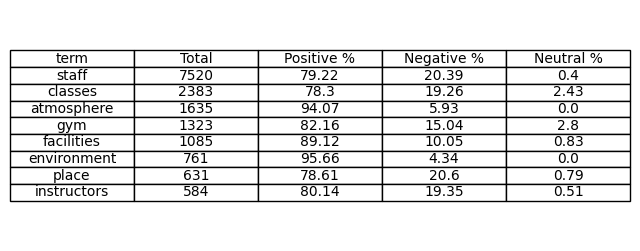

In [ ]:
import matplotlib.pyplot as plt

positive = df_result[df_result['Positive %'] > 75].reset_index()

# Generate and save the table as an image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=positive.values, colLabels=positive.columns, loc='center', cellLoc='center', colLoc='center')

# Save as image
plt.savefig('/content/Positive_Aspects_CustomerRated.png', bbox_inches='tight', pad_inches=0.05)

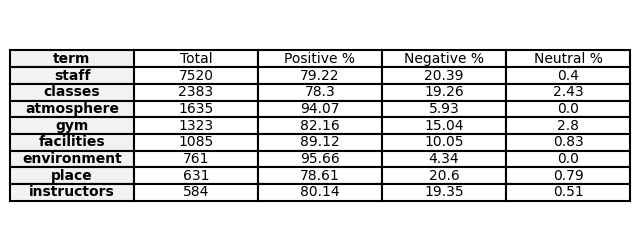

In [ ]:
import matplotlib.pyplot as plt

positive = df_result[df_result['Positive %'] > 75].reset_index()

# Generate and save the table as an image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=positive.values, colLabels=positive.columns, loc='center', cellLoc='center', colLoc='center')

# Style the first column (Aspects) and increase row thickness
for i, key in enumerate(table.get_celld().keys()):
    cell = table[key]
    row, col = key
    if col == 0:  # Emphasize the 'Aspects' column
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')  # Bold text for 'Aspects' column
        cell.set_facecolor('#f2f2f2')  # Light grey background for 'Aspects' column
    else:
        cell.set_fontsize(12)
        cell.set_text_props(weight='normal')

    # Increase row thickness and set border color
    cell.set_edgecolor('black')  # Black border for all cells
    cell.set_linewidth(1.5)  # Increase the line width for row thickness

# Save as image with better padding and quality
plt.savefig('/content/Positive_Aspects_CustomerRated.png', bbox_inches='tight', pad_inches=0.05, dpi=300)

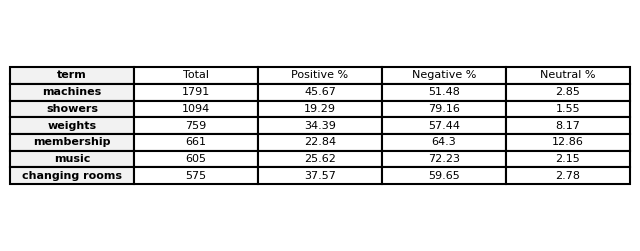

In [ ]:
import matplotlib.pyplot as plt

negative = df_result[df_result['Negative %'] >= 50].reset_index()

# Generate and save the table as an image
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=negative.values, colLabels=negative.columns, loc='center', cellLoc='center', colLoc='center')

# Style the first column (Aspects) and increase row thickness
for i, key in enumerate(table.get_celld().keys()):
    cell = table[key]
    row, col = key
    if col == 0:  # Emphasize the 'Aspects' column
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')  # Bold text for 'Aspects' column
        cell.set_facecolor('#f2f2f2')  # Light grey background for 'Aspects' column
    else:
        cell.set_fontsize(12)
        cell.set_text_props(weight='normal')

    # Increase row thickness and set border color
    cell.set_edgecolor('black')  # Black border for all cells
    cell.set_linewidth(1.5)  # Increase the line width for row thickness

# Save as image with better padding and quality
plt.savefig('/content/Negative_Aspects_CustomerRated.png', bbox_inches='tight', pad_inches=0.05, dpi=300)